<a href="https://colab.research.google.com/github/Kenwthhh/RM/blob/main/EDUAI_L1CH1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's Try Unsupervised Learning
## Using K-means algorithm to recognize hand-written digits

### By AIDCEC, EDUHK

# 1. Load necessary packages

In [ ]:
# 從 sklearn 載入手寫辨識資料集
from sklearn.datasets import load_digits

# 載入我們會用到的模型，K-Means分群模型
from sklearn.cluster import KMeans

# 載入用來做資料視覺化的畫圖套件
import matplotlib.pyplot as plt

# 載入做數學運算的套件 Numpy
import numpy as np

#载入pandas套件
import pandas as pd

print("Packages load complete")

Packages load complete


# 2. Load dataset and observe data characteristics


## 2.1 Print dataset

In [ ]:
# 載入手寫字資料庫到digits變數中
digits = load_digits()

features_df= pd.DataFrame(digits.data)
digit_label_df=pd.DataFrame(digits.target,columns=["Representing digits"])
complete_df= pd.concat([digit_label_df, features_df], axis=1)
complete_df

,Representing digits,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


## 2.2 What is in the data?

### 2.2.1 The first record

In [ ]:


# 觀察資料筆數
print("資料筆數:")
print(digits.data.shape, "\n")

# 觀察我們資料的欄位名稱
print("資料的欄位名稱，分別是:")
print(digits.target_names, "\n")

# 觀察我們第一筆的資料內容
print("第一筆的資料內容:")
print(digits.data[0], "\n")

# 觀察我們第一筆的影像內容
print("第一筆的影像內容:")
print(digits.images[0], "\n")

# 觀察我們第一筆的預測目標
print("第一筆的預測目標:")
print(digits.target[0], "\n")

資料筆數:
(1797, 64) 

資料的欄位名稱，分別是:
[0 1 2 3 4 5 6 7 8 9] 

第一筆的資料內容:
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] 

第一筆的影像內容:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]] 

第一筆的預測目標:
0 



### 2.2.2 The image of the first record

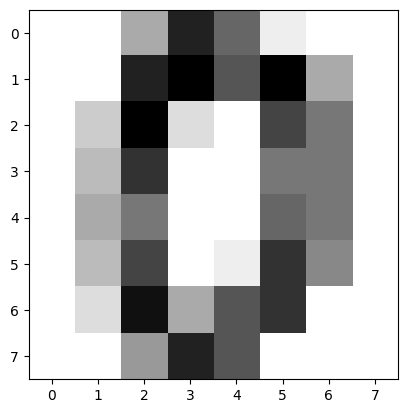

In [ ]:
# 試試看用資料視覺畫的套件來畫出 image 影像資料
# cmap 是指取用哪種顏色顯示, plt.cm.binary 是顯示灰階的顏色庫
plt.imshow(digits.images[0] , cmap=plt.cm.binary) # Try different images by changing the numbers

### 2.2.3 The images of the first ten records

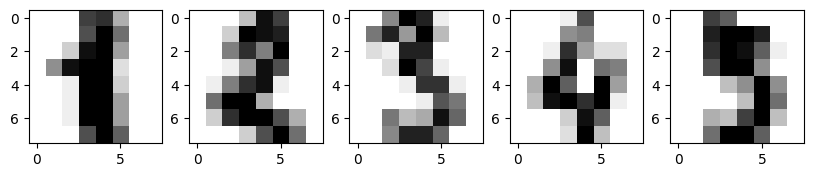

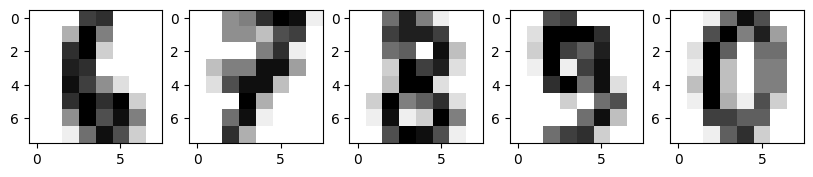

In [ ]:
# 一次看前十筆的影像資料

# 先畫第一列
# figsize 代表畫布的大小, 這裡是希望設定成長=10, 寬=10, 單位是英寸
plt.figure(figsize=(10,10))

for i in range(1,6):
  plt.subplot(1,5,i)
  plt.imshow(digits.images[i], cmap=plt.cm.binary)
plt.show()

# 再畫第二列
plt.figure(figsize=(10,10))

for i in range(6,11):
  plt.subplot(2,5,i)
  plt.imshow(digits.images[i], cmap=plt.cm.binary)
plt.show()

# 4. Model training and validation

## 4.1 Model training

In [ ]:
# 載入 K-means 模型，設定將資料分成十群
estimator = KMeans(n_clusters=10, random_state=18)

# 進行模型訓練，因為K-means是非監督式學習，故不用放入label的標籤資料
estimator.fit(digits.data)

print("Training complete")

Training complete


## 4.2 Check the first four clusters

[11 21 24 42 47 56 70 75 77 80]
[ 0 10 20 30 36 48 49 55 72 78]
[ 12  22  84 113 132 142 152 180 181 184]
[  4  14  41  64  68  87  97 100 110 111]


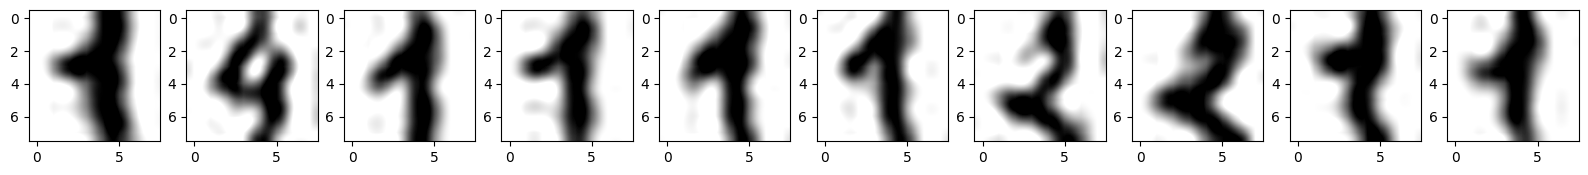

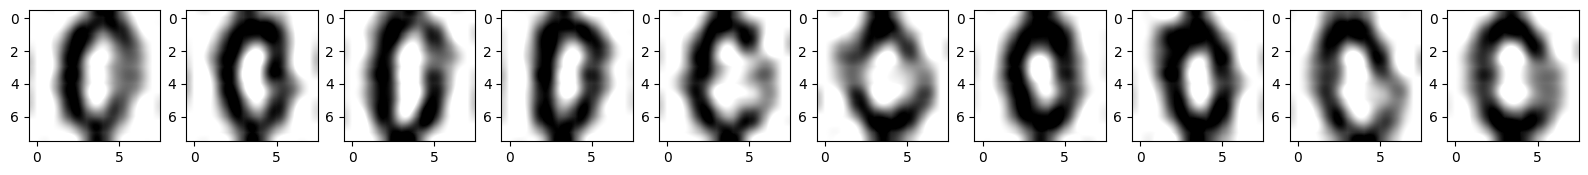

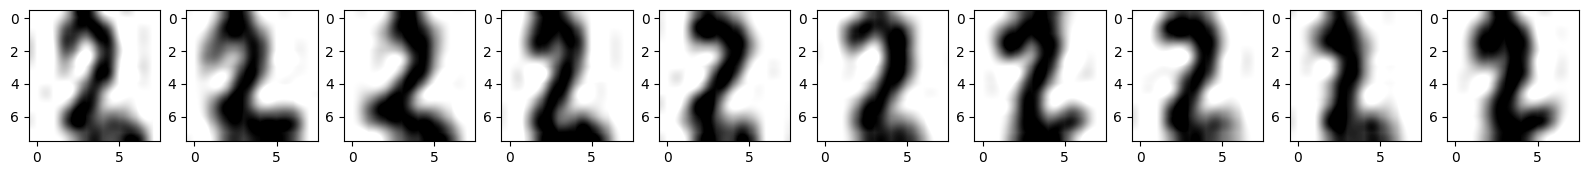

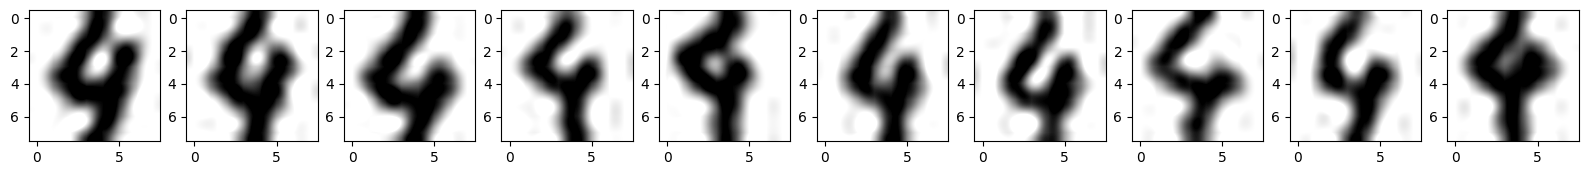

In [ ]:
# 這邊分別取出 K-means模型幫我們分好的其中三群出來看
# 分別就是 label為0,1,2的三群，並把他們的位置(index)存到變數 c_0, c_1, c_2內
c_0 = np.where(estimator.labels_== 0 )[0]
c_1 = np.where(estimator.labels_== 1 )[0]
c_2 = np.where(estimator.labels_== 2 )[0]
c_3 = np.where(estimator.labels_== 3 )[0]

# 印出這三個變數的前十筆資料來看
# 他們代表著不同群集裡，分別在 digits 裡面的排序位置
print(c_0[0:10])
print(c_1[0:10])
print(c_2[0:10])
print(c_3[0:10])


# 把這三個集群分成三列顯示出來看看
# 這下面有一個方法 interpolation='sinc'，他會讓影像用sin波取內插取值，讓影像更清晰

# 先畫第一列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(1,10,i)
  plt.imshow(digits.images[c_0[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

# 再畫第二列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(2,10,i)
  plt.imshow(digits.images[c_1[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

# 再畫第三列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(3,10,i)
  plt.imshow(digits.images[c_2[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(4,10,i)
  plt.imshow(digits.images[c_3[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

# 5. What if we classified digits into 3 classes only?

In [ ]:
# 載入 K-means 模型，設定將資料分成三群
estimator = KMeans(n_clusters= 3, random_state=18)
estimator.fit(digits.data)

c_0 = np.where(estimator.labels_== 0 )[0]
c_1 = np.where(estimator.labels_== 1 )[0]
c_2 = np.where(estimator.labels_== 2 )[0]

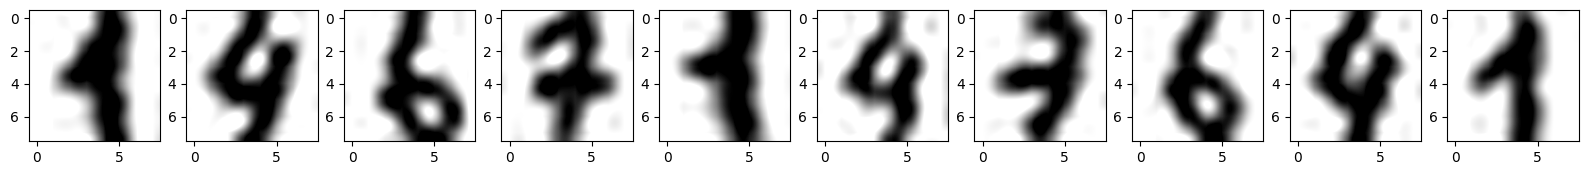

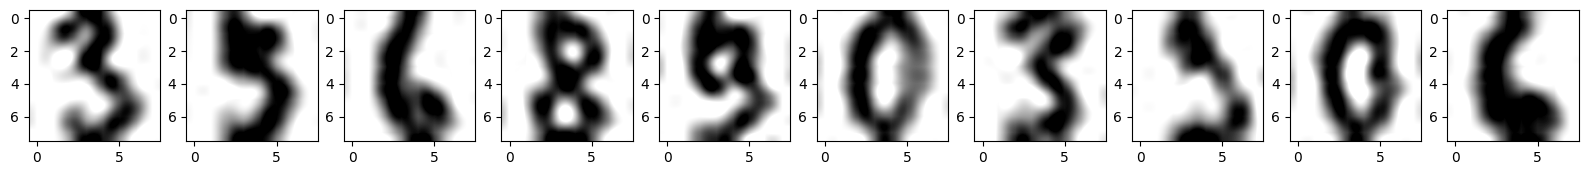

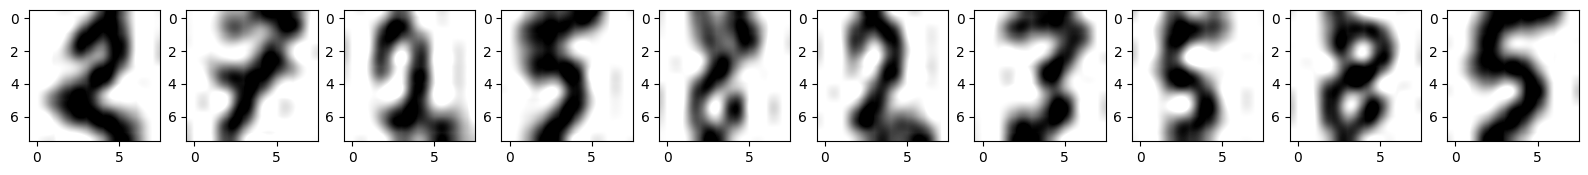

In [ ]:
# 把這三個集群分成三列顯示出來看看

# 先畫第一列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(1,10,i)
  plt.imshow(digits.images[c_0[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

# 再畫第二列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(2,10,i)
  plt.imshow(digits.images[c_1[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()

# 再畫第三列
plt.figure(figsize=(20,20))

for i in range(1,11):
  plt.subplot(3,10,i)
  plt.imshow(digits.images[c_2[i]], cmap=plt.cm.binary, interpolation='sinc')
plt.show()